In [2]:
#import libs
import numpy as np 
import torch 
import matplotlib.pyplot as plt 
import scipy.io

# import files 
from DataSet import DataSet

In [41]:
ds = DataSet('data/','nhp','Cebus2_M1_200123.mat','cebus2')
ds.load_matlab_data()

In [42]:
print(ds.set.keys())

dict_keys(['emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy'])


In [43]:
print(ds.set['sorted_respMean'].shape)
print(ds.set['ch2xy'].shape)

(96, 8)
(96, 2)


In [44]:
map_emg = np.full((ds.set['sorted_respMean'].shape[1],
                    np.max(ds.set['ch2xy'][:,0]),
                    np.max(ds.set['ch2xy'][:,1])
                    ), 
                    np.nan)
for i in range(ds.set['ch2xy'].shape[0]):
    map_emg[:,int(ds.set['ch2xy'][i,0]-1),int(ds.set['ch2xy'][i,1]-1)] = ds.set['sorted_respMean'][i,:]
print(map_emg)

[[[       nan 0.00094089 0.0012593  0.00197475 0.00125254 0.00117496
   0.00103802 0.00101562 0.00094119        nan]
  [0.0009488  0.00114551 0.00135125 0.00121635 0.00107141 0.00091057
   0.00137431 0.00126103 0.00093522 0.00094718]
  [0.00106872 0.00122451 0.00128333 0.00106293 0.00092774 0.00100424
   0.00106388 0.00141551 0.00102431 0.00139431]
  [0.00091641 0.00106877 0.00104541 0.00106445 0.00079174 0.00101103
   0.00079988 0.00083598 0.00108379 0.00107494]
  [0.00204042 0.00293113 0.0017442  0.00095402 0.00120245 0.00097332
   0.00101047 0.00094924 0.00131162 0.00173959]
  [0.00880766 0.01662835 0.0064621  0.00303703 0.00222536 0.00087355
   0.00100264 0.0009109  0.00150145 0.00104771]
  [0.00584653 0.00622654 0.00269148 0.00317506 0.00204387 0.00085483
   0.00189841 0.00168511 0.00253236 0.00165434]
  [0.00510484 0.00710797 0.00517642 0.00456277 0.00177039 0.00191614
   0.00160709 0.00299007 0.00270658 0.00255973]
  [0.00199454 0.00730759 0.00148152 0.00138682 0.00162807 0.0030

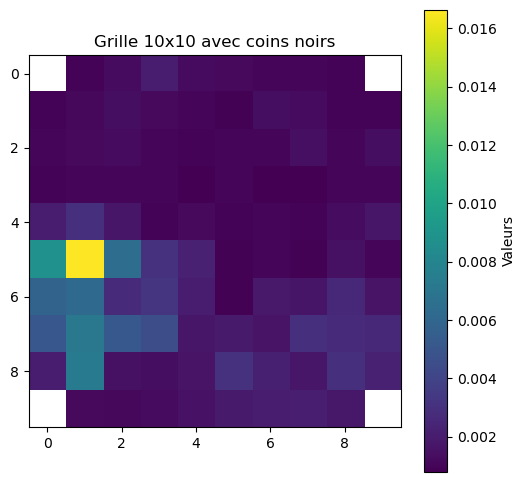

In [45]:
plt.figure(figsize=(6, 6))
plt.imshow(map_emg[0], cmap='viridis', vmin=np.nanmin(map_emg[0]), vmax=np.nanmax(map_emg[0]))
plt.colorbar(label="values")
plt.title("title")
plt.show()

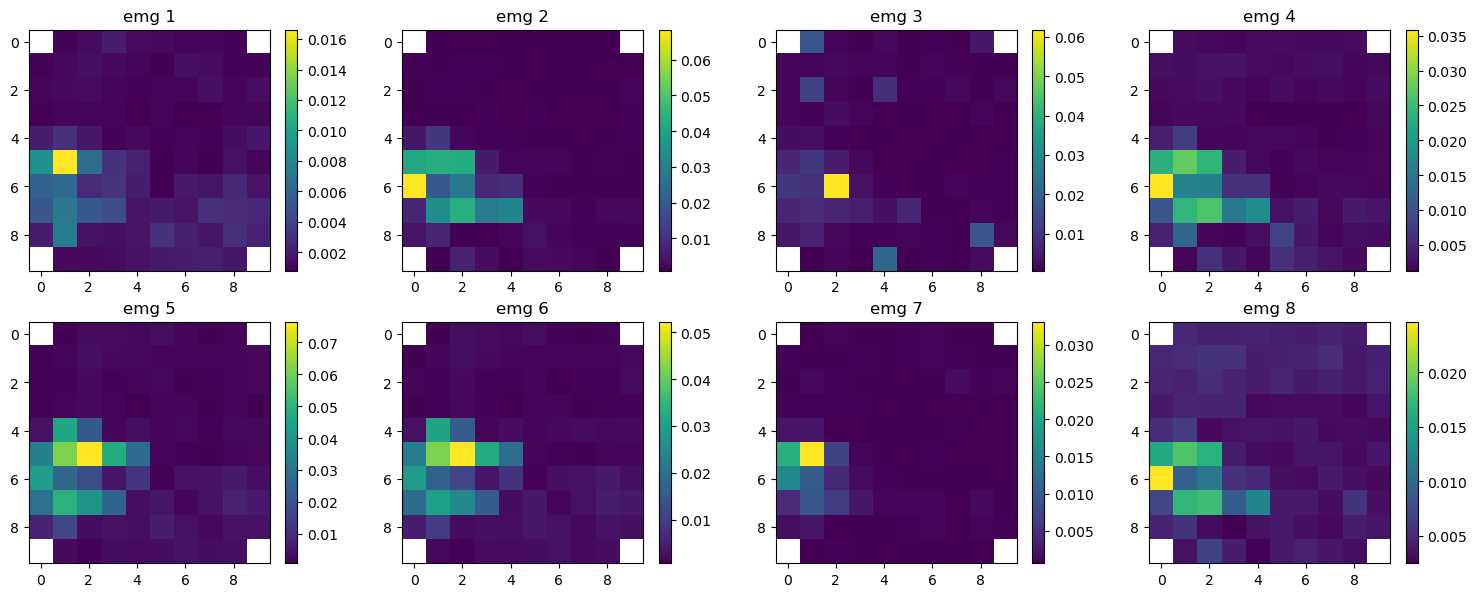

In [53]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6)) 

for idx, ax in enumerate(axes.flat):
    cax = ax.imshow(map_emg[idx], cmap='viridis', vmin=np.nanmin(map_emg[idx]), vmax=np.nanmax(map_emg[idx])) 
    ax.set_title(f'emg {idx + 1}')
    plt.colorbar(cax, ax=ax)

plt.tight_layout()
plt.show()

In [62]:
ds = DataSet('data/','rat','rat1_M1_190716.mat','rat1')
ds.load_matlab_data()

In [63]:
print(ds.set.keys())

dict_keys(['emgs', 'nChan', 'sorted_isvalid', 'sorted_resp', 'sorted_respMean', 'ch2xy'])


In [64]:
print(ds.set['sorted_respMean'].shape)
print(ds.set['ch2xy'].shape)

(32, 6)
(32, 2)


In [65]:
map_emg = np.full((ds.set['sorted_respMean'].shape[1],
                    np.max(ds.set['ch2xy'][:,0]),
                    np.max(ds.set['ch2xy'][:,1])
                    ), 
                    np.nan)
for i in range(ds.set['ch2xy'].shape[0]):
    map_emg[:,int(ds.set['ch2xy'][i,0]-1),int(ds.set['ch2xy'][i,1]-1)] = ds.set['sorted_respMean'][i,:]
print(map_emg)

[[[ 32.62022781 128.53517151   5.09192228   7.36184454]
  [ 16.62318993  50.30888367   7.07644701   7.69359732]
  [ 20.68482208  19.58361435   5.66501522   7.68769979]
  [ 11.64266872  11.26026344   8.09384346   7.89205647]
  [ 10.80054665  19.1391201    6.72087574  10.20454693]
  [  6.63374996  19.35565948   5.57446098   7.009583  ]
  [  5.85829687  10.58271217   5.90652323   9.33077717]
  [  8.94086266  10.86876106   8.05884171  12.20848083]]

 [[107.22922516 171.71104431  37.39712906  46.47663879]
  [ 83.82292175  82.05056     33.03754044  42.64255524]
  [ 57.88157654 123.80635834  40.76599503  32.96233368]
  [ 43.47373581  37.19080734  41.44324875  26.69222641]
  [ 47.95727539  44.30805588  38.95489883  36.68785858]
  [ 36.19430542  57.47556686  34.78194809  37.78835678]
  [ 43.01721191  44.82548523  32.50603104  41.0740242 ]
  [ 42.13519669  63.32608795  28.16931343  34.87698746]]

 [[ 19.93132782  36.97771454   3.57354116   5.44732237]
  [ 24.58530426  22.09725952   3.71889544  1

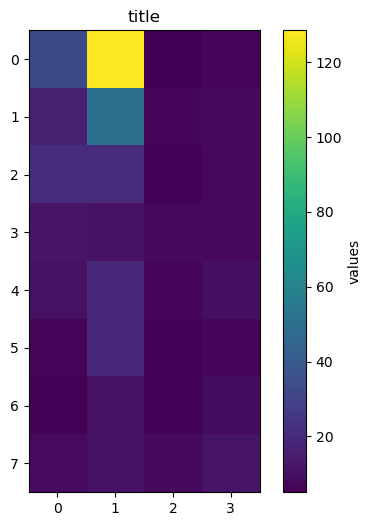

In [67]:
plt.figure(figsize=(6, 6))
plt.imshow(map_emg[0], cmap='viridis', vmin=np.nanmin(map_emg[0]), vmax=np.nanmax(map_emg[0]))
plt.colorbar(label="values")
plt.title("title")
plt.show()

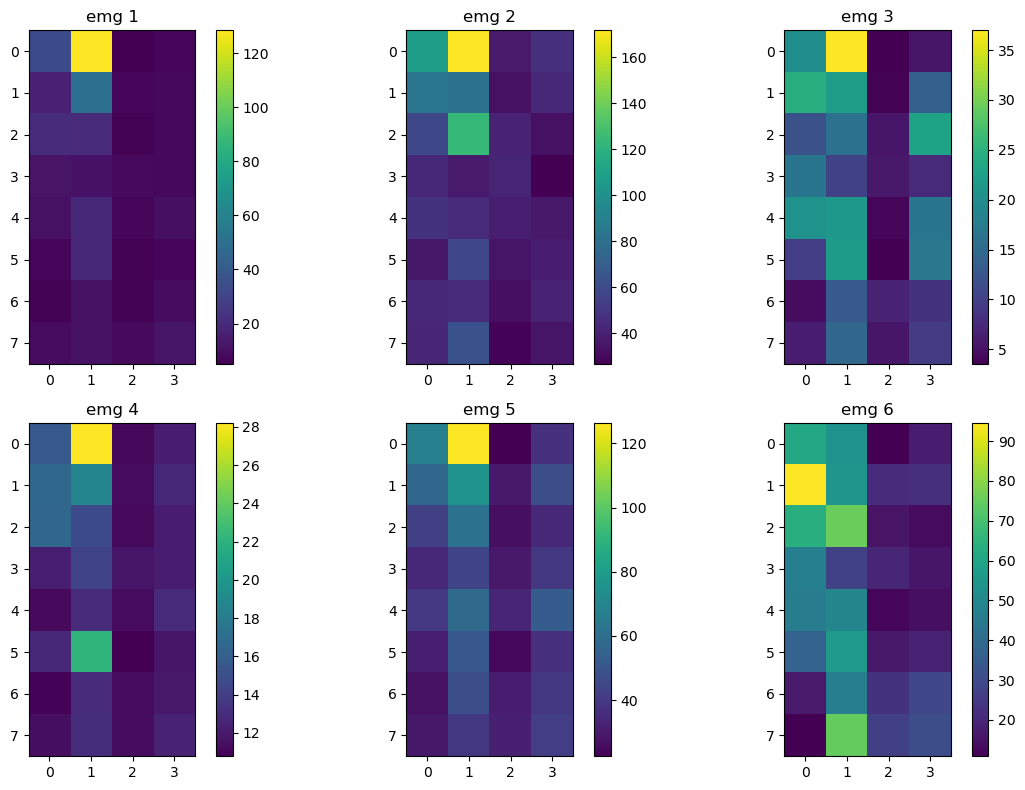

In [70]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8)) 

for idx, ax in enumerate(axes.flat):
    cax = ax.imshow(map_emg[idx], cmap='viridis', vmin=np.nanmin(map_emg[idx]), vmax=np.nanmax(map_emg[idx])) 
    ax.set_title(f'emg {idx + 1}')
    plt.colorbar(cax, ax=ax)

plt.tight_layout()
plt.show()